<a href="https://colab.research.google.com/github/drabhishekk14/AIML_Notebooks/blob/main/SIG742Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Student Name : - Abhishek Kadam, Krishnamurthy S, Abhinav Kapoor**

### **Student id: - 223014373, 223019221 ,223029476**

### **Attempting High Distinction: - Yes**

In [1]:
#Importing all the packages needed for the midterm assignment.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# **Part 1**

**Answer 1.1**

In [2]:
df = pd.read_json('/content/drive/MyDrive/MDS/assignment2data.json', lines = True)

In [3]:
# Making 'customer_id' col as the firt column of the dataframe
col = df.pop('customer_id')
df.insert(0, col.name, col)
#To find the duplicates in the dataframe, sort the dataframe first on customer_id;
#then create a series to collect all the duplicate values in the dataframe using
#duplicated() function
df.sort_values("customer_id", inplace = True)
dup_series = df["customer_id"].duplicated()

In [4]:
#Finding the duplicates in the dataframe
df[dup_series]

,customer_id,sacc_items,work_orders,female_items,is_newsletter_subscriber,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
30251,014679384624789f16f1c6f8cf7da2b3,0,0,8,Y,1,0,2,4,1,...,0,0,0,9,0,2,0,4,0,0.1079
11339,031af4fbbdba1de1591db6771e953679,0,0,0,N,1,0,0,0,0,...,0,0,1,2,0,1,0,0,0,0.0000
22223,0558d155816cc709a2d2db774f7d14fa,0,0,6,N,0,0,0,0,0,...,0,0,0,6,0,1,0,6,0,0.2333
20881,05aea1f4aa5e1f14008d7af7275c5aed,0,0,4,Y,0,0,2,0,0,...,0,0,0,4,0,1,0,0,0,0.1499
19302,05b1a9d2f6b95262ccb76e0e03969dc1,0,0,1,N,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0.2671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15818,fda7a8b98ea6683a22317b9472bfff3d,0,0,0,N,6,0,2,0,0,...,0,0,0,6,0,1,0,0,0,0.4999
11565,fe0b31d51496a604306cbb44890c62c0,0,0,1,N,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0.0000
40877,fe1a5b9fa45a2201e169dd951cf8cdc5,0,0,0,Y,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0.2999
16699,fee54932d88b1d6cdbed9a13db8ed265,0,0,6,N,0,0,0,5,0,...,0,0,0,6,0,1,0,1,0,0.6250


**Removing duplicates from the dataframe**

In [5]:
# dropping ALL duplicate values
df.drop_duplicates(subset="customer_id",
                     keep=False, inplace=True)

In [6]:
df.info()
df.sort_index()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45781 entries, 32235 to 19250
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               45781 non-null  object 
 1   sacc_items                45781 non-null  int64  
 2   work_orders               45781 non-null  int64  
 3   female_items              45781 non-null  int64  
 4   is_newsletter_subscriber  45781 non-null  object 
 5   male_items                45781 non-null  int64  
 6   afterpay_payments         45781 non-null  int64  
 7   msite_orders              45781 non-null  int64  
 8   wftw_items                45781 non-null  int64  
 9   mapp_items                45781 non-null  int64  
 10  orders                    45781 non-null  int64  
 11  cc_payments               45781 non-null  int64  
 12  curvy_items               45781 non-null  int64  
 13  paypal_payments           45781 non-null  int64  
 14  ma

,customer_id,sacc_items,work_orders,female_items,is_newsletter_subscriber,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
0,64f7d7dd7a59bba7168cc9c960a5c60e,0,0,46,N,2,0,0,7,2,...,0,4,1,50,0,1,0,35,0,0.3364
1,fa7c64efd5c037ff2abcce571f9c1712,0,0,24,Y,0,0,12,2,0,...,0,3,4,26,0,2,0,16,0,0.1404
2,18923c9361f27583d2320951435e4888,0,0,147,Y,3,1,10,33,2,...,0,3,17,152,0,2,1,96,0,0.1851
3,aa21f31def4edbdcead818afcdfc4d32,0,0,0,Y,0,0,0,0,1,...,0,0,0,2,0,1,0,1,0,0.0000
4,668c6aac52ff54d4828ad379cdb38e7d,0,0,1,Y,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46274,5b34391ec6fbc0f189cb8d3d88806199,0,0,36,N,2,0,1,7,1,...,0,4,8,40,0,2,0,17,0,0.0091
46275,198fd2f143f70b149344bcaf7eddee12,0,13,13,Y,2,0,0,5,2,...,0,2,1,19,0,2,1,5,0,0.1210
46276,338b5c8ade4af1a562d55d4036710630,0,0,2,N,0,0,0,0,0,...,0,0,0,2,0,1,1,2,0,0.1500
46277,2115c065bfc1f3b39e4c87c202e80fa5,0,0,15,Y,0,0,7,0,0,...,0,0,0,15,0,2,0,13,0,0.1824


**The original dataframe had 46279 records, and after removing the 498 duplicates the final dataframe has 45781 records.**

**Answer 1.2**

In [7]:
# Defining a function 'missingdf' for could print out all the column 
#in dataframe df and also the missing value rate for each column.
def missingdf(df):
  column_name = df.columns # For collecting all the column names in
  new_df = [] # For collecting missing value rate
  for i in range (df.columns.shape[0]): # For loop to iterate over all the columns
    missing_value_rate = df.isnull().sum()/len(df)*100 # Calculating missing value rate
    new_df.append(missing_value_rate) # Appending the missing value rate to new_df
    # converting the list new_df to a dataframe with prescribed column names
    new_df = pd.DataFrame({'column_name':column_name,'percent_missing':missing_value_rate}) 
    return(new_df)

In [8]:
df = pd.read_json('/content/drive/MyDrive/MDS/assignment2data.json', lines = True)

In [9]:
Percent_Missing = missingdf(df)
Percent_Missing

,column_name,percent_missing
sacc_items,sacc_items,0.000000
work_orders,work_orders,0.000000
female_items,female_items,0.000000
is_newsletter_subscriber,is_newsletter_subscriber,0.000000
male_items,male_items,0.000000
afterpay_payments,afterpay_payments,0.000000
msite_orders,msite_orders,0.000000
wftw_items,wftw_items,0.000000
mapp_items,mapp_items,0.000000
orders,orders,0.000000


**Answer 1.3**

In [10]:
#Open the assignment2data.json file and convert it to csv format as dataframe in pandas.
df = pd.read_json('/content/drive/MyDrive/MDS/assignment2data.json', lines = True)
df.shape

(46279, 43)

In [11]:
#Removing the duplicated rows from dataframe and save as the new dataframe.
df.drop_duplicates(subset="customer_id",
                     keep=False, inplace=True)
df.shape

(45781, 43)

In [12]:
#define a function column_list(df) which could return a list which only contains the numerical
#column names and another list which only contains the categorical column names.
def column_list(df):
  Numerical_Columns = df.select_dtypes(exclude=['object']).columns.tolist()
  Categorical_Columns = df.select_dtypes(include=['object']).columns.tolist()
  print("Numerical_Columns are %s" % (Numerical_Columns))
  print("Categorical_Columns are %s" %(Categorical_Columns))

In [13]:
# list which only contains the numerical column names and another list which only contains the categorical column names
dataframe_cols = column_list(df)

Numerical_Columns are ['sacc_items', 'work_orders', 'female_items', 'male_items', 'afterpay_payments', 'msite_orders', 'wftw_items', 'mapp_items', 'orders', 'cc_payments', 'curvy_items', 'paypal_payments', 'macc_items', 'cancels', 'revenue', 'returns', 'other_collection_orders', 'parcelpoint_orders', 'android_orders', 'days_since_last_order', 'vouchers', 'average_discount_used', 'shipping_addresses', 'redpen_discount_used', 'mftw_items', 'days_since_first_order', 'unisex_items', 'home_orders', 'coupon_discount_applied', 'desktop_orders', 'ios_orders', 'apple_payments', 'wspt_items', 'wacc_items', 'items', 'mspt_items', 'devices', 'different_addresses', 'wapp_items', 'other_device_orders', 'average_discount_onoffer']
Categorical_Columns are ['is_newsletter_subscriber', 'customer_id']


In [14]:
# Using describe() function from pandas to print out the statistics for all num
df.describe(exclude = ['object'])

,sacc_items,work_orders,female_items,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,cc_payments,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
count,45781.000000,45781.000000,45781.000000,45781.000000,45781.000000,45781.000000,45781.000000,45781.000000,45781.000000,45781.000000,...,45781.000000,45781.000000,45781.000000,45781.000000,45781.000000,45781.000000,45781.000000,45781.000000,45781.000000,45781.00000
mean,0.088159,0.242218,6.479850,1.722134,0.053756,0.978987,1.634324,0.926127,4.114545,0.643564,...,0.000568,0.378978,0.574256,8.592517,0.116511,1.277692,0.116249,3.806535,0.000044,0.19007
std,0.540783,1.569192,17.854895,5.473037,0.225538,2.862556,4.092501,3.686082,8.130112,0.478951,...,0.023825,1.713990,2.546401,19.986943,0.718211,0.533146,0.320527,12.699237,0.009347,0.19059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.15000
75%,0.000000,0.000000,5.000000,1.000000,0.000000,1.000000,2.000000,0.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.31440
max,29.000000,84.000000,537.000000,273.000000,1.000000,172.000000,261.000000,151.000000,665.000000,1.000000,...,1.000000,56.000000,353.000000,701.000000,38.000000,3.000000,1.000000,409.000000,2.000000,1.00000


 **Answer 1.4**

In [15]:
# Open the assignment2data.json file and convert it to csv format as dataframe in pandas.
# Removing duplicates form the data
df = pd.read_json('/content/drive/MyDrive/MDS/assignment2data.json', lines = True)
df.drop_duplicates(subset="customer_id",
                     keep=False, inplace=True)


**There are two columns which are corrupted.** **Could you find it out and**
**explain the reason?**

Answer - The two columns which seem to be corrupted are **"redpen_discount_used"** and **"coupon_discount_applied"**. There is no description of these cloumns available. While the column names indicate discount applied, there is another column **"average_discount_used"** available with a appropirate description. Hence, the columns "redpen_discount_used" and "coupon_discount_applied" are not providing any additional information about the customer. When the dataframe was reviewed, strong correlation between "average_discount_used" and "redpen_discount_used" and "coupon_discount_applied" **was not observed** as shown in the heat map below. **Hence my recommendation is to remove these two columns from the dataset.**

In [16]:
df = df[['average_discount_used','redpen_discount_used','coupon_discount_applied']].copy()
df.info()
print(' ')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45781 entries, 0 to 46278
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   average_discount_used    45781 non-null  float64
 1   redpen_discount_used     45781 non-null  float64
 2   coupon_discount_applied  35578 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB
 
       average_discount_used  redpen_discount_used  coupon_discount_applied
count           45781.000000          45781.000000             35578.000000
mean             2356.851508            435.922673               175.962188
std              2031.649704           1853.752239               843.897996
min                 0.000000              0.000000                 0.000000
25%                77.532200              0.000000                 0.000000
50%              2122.996900             54.480000                 0.000000
75%              3829.304700            253.7100

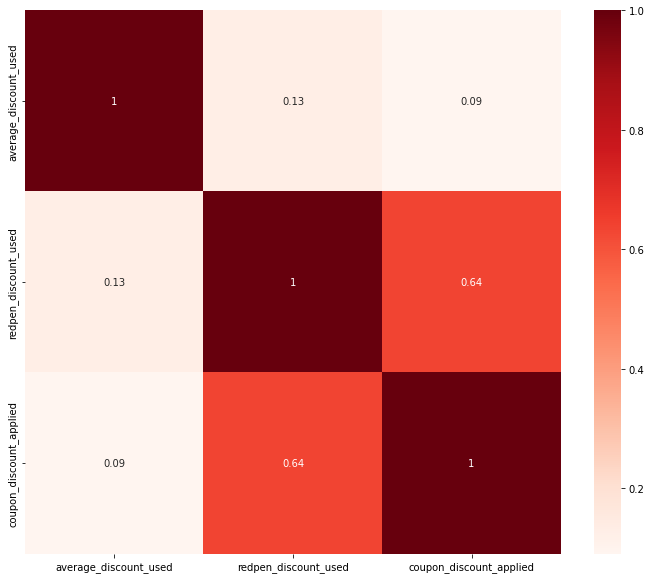

In [17]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Answer 1.5**

In [18]:
# Open the assignment2data.json file and convert it to csv format as dataframe in pandas.
# Removing duplicates form the data
df = pd.read_json('/content/drive/MyDrive/MDS/assignment2data.json', lines = True)
df.drop_duplicates(subset="customer_id",
                     keep=False, inplace=True)
df.to_csv('df.csv')

In [19]:
#Write code and return the results by using pandas package to find out ”What percentage of 
#customers who have purchased female items have paid by credit card?”

# create variable 'female_items' to collect count of customers that purchased female items
female_items = len(df[df['female_items'] !=0])
female_items
print("Total count of female items purchased is %s" % (female_items))

# create variable 'cc_payment_female_items' to collect count of customers that purchased female items with cc payment
cc_payments_female_items = len(df[(df['cc_payments']== 1) & (df['female_items']!= 0)])
cc_payments_female_items
print("Count of female items purchased with credit card is %s" % (cc_payments_female_items))

#create variable 'perccentag' to collect the calculation of percentage of female items purchased with credit card and rounding it to 2 decimal places
percentage = round(cc_payments_female_items/female_items *100, 2)
percentage
print("Therefore percentage of female items purchased by credit card is %s percent." % (percentage))

Total count of female items purchased is 34147
Count of female items purchased with credit card is 22378
Therefore percentage of female items purchased by credit card is 65.53 percent.


In [20]:
#Write code and return the results by using pandas package to find out ”What was the total
#revenue to the nearest dollar for customers who have paid by credit card?”

#Create a dataframe 'revenue_cc' which has records where revenue is not zero and credit card payment is true.
revenue_cc = df[(df['revenue'] != 0) & (df['cc_payments']== 1)]

#Create a variable 'revenue_cc_sum' to collect the sum of values in the 'revenue' column of 'revenue_cc' dataframe.
revenue_cc_sum = round(revenue_cc['revenue'].sum(), 0)

#printing the total revenue to the nearest dollar.
print("The total revenue to the nearest dollar for customers who paid by credit card is $%s" %(revenue_cc_sum))

The total revenue to the nearest dollar for customers who paid by credit card is $50006375.0


**Answer 1.6**

In [21]:
# Open the assignment2data.json file and convert it to csv format as dataframe in pandas.
# Removing duplicates form the data
df = pd.read_json('/content/drive/MyDrive/MDS/assignment2data.json', lines = True)
df.drop_duplicates(subset="customer_id",
                     keep=False, inplace=True)
df.to_csv('df.csv')

In [22]:
# change the value of 'Y' from column is_newsletter_subscriber to 1 and 'N' from column is_newsletter_subscriber to 0. 1 and 0 to be integers
#using replace() method to change the values as it allows object dtype to be replaced with int dtype
df = df.replace({'is_newsletter_subscriber': {'Y': 1, 'N':0}})

#printing the head of 'is_newsletter_subscriber' cloumn to ensure the replacement is in effect.
print(df.is_newsletter_subscriber.head())

# Print out the value count for column is_newsletter_subscriber.
is_newsletter_subscriber_count_1 = df['is_newsletter_subscriber'].value_counts()[1]
is_newsletter_subscriber_count_0 = df['is_newsletter_subscriber'].value_counts()[0]

print ("The value count for column 'is_newsletter_subscriber' where value is '1' is %s and where value is '0' the count is %s"  
       % (is_newsletter_subscriber_count_1, is_newsletter_subscriber_count_0))

0    0
1    1
2    1
3    1
4    1
Name: is_newsletter_subscriber, dtype: int64
The value count for column 'is_newsletter_subscriber' where value is '1' is 18749 and where value is '0' the count is 27032


**Answer 1.7**

In [23]:
# Open the assignment2data.json file and convert it to csv format as dataframe in pandas.
# Removing duplicates form the data
df = pd.read_json('/content/drive/MyDrive/MDS/assignment2data.json', lines = True)
df.drop_duplicates(subset="customer_id",
                     keep=False, inplace=True)
df.to_csv('df.csv')

In [24]:
#Create some new features for the dataframe by using the code provided in the assingment.
df['female_item_rate' ] = df['female_items'] / df['items']
df['male_item_rate' ] = df['male_items'] / df['items']
df['unisex_item_rate' ] = df['unisex_items'] / df['items']

#How many rows (customers) could have the value female_item_rate == 1. Using value_counts method to count the specific vlaues in column
female_item_rate_count_1 = df['female_item_rate'].value_counts()[1]
print('%s rows have female_item_rate equal to 1.' % (female_item_rate_count_1))

#How many rows (customers) could have the value male_item_rate == 1. Using value_counts method to count the specific vlaues in column
male_item_rate_count_1 = df['male_item_rate'].value_counts()[1]
print('%s rows have male_item_rate equal to 1.' % (male_item_rate_count_1))

#How many rows (customers) could have the value orders > 4.11. Used the len function to get the number of rows that were meeting the specific criterion
orders = len(df[df['orders'] > 4.11])
print('%s rows have orders > 4.11.' % (orders))

23618 rows have female_item_rate equal to 1.
7848 rows have male_item_rate equal to 1.
9941 rows have orders > 4.11.


**Answer 1.8**

In [25]:
# Open the assignment2data.json file and convert it to csv format as dataframe in pandas.
# Removing duplicates form the data
df = pd.read_json('/content/drive/MyDrive/MDS/assignment2data.json', lines = True)
df.to_csv('df_original.csv')
df.drop_duplicates(subset="customer_id",
                     keep=False, inplace=True)
df.to_csv('df.csv')

In [26]:
# use the original format of the data to group data on the value of column
#'is_newsletter_subscriber' to show the average order value, the max order value, the median order value.

# Since the dataframe is recreated for this answer the data frame has original values 'Y' and 'N' in the column 'is_newsletter_subscriber'.

#Used the groupby function to group the data.
grouped_data = df.groupby('is_newsletter_subscriber')
grouped_data.first()


,sacc_items,work_orders,female_items,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,cc_payments,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
is_newsletter_subscriber,,,,,,,,,,,,,,,,,,,,,
N,0,0,46,2,0,0,7,2,17,1,...,0,4,1,50,0,1,0,35,0,0.3364
Y,0,0,24,0,0,12,2,0,13,0,...,0,3,4,26,0,2,0,16,0,0.1404


In [27]:
#Showing average order value
average_order_value = grouped_data.orders.mean()
average_order_value
print("The average order value based on newsletter subcription is \n%s" % (average_order_value))


The average order value based on newsletter subcription is 
is_newsletter_subscriber
N    2.486460
Y    6.461891
Name: orders, dtype: float64


In [28]:
#Showing max order value
max_order_value = grouped_data.orders.max()
max_order_value
print("The maximum order value based on newsletter subcription is \n%s" % (max_order_value))

The maximum order value based on newsletter subcription is 
is_newsletter_subscriber
N    665
Y    234
Name: orders, dtype: int64


In [29]:
#Showing median order value
median_order_value = grouped_data.orders.median()
median_order_value
print("The median order value based on newsletter subcription is \n%s" % (median_order_value))

The median order value based on newsletter subcription is 
is_newsletter_subscriber
N    1.0
Y    3.0
Name: orders, dtype: float64


# **Part 2**

Which version of Question 2 for our group? - **Team - 20**

In [30]:
def sum_digits(n):
  r = 0
  while n:
    r, n = r + n % 10, n // 10
    return r

def check_studentid (studentid_list):
  studentid = sum (studentid_list)
  x = sum_digits (studentid)
  if x % 2 == 0:
    print ('vesrion II')
  else:
    print ('version I')

check_studentid ([223019221, 223029476, 223014373])

vesrion II


In [31]:
#Loading the transactions data given for the assignment.
df = pd.read_csv('/content/drive/MyDrive/MDS/customer_transaction.csv')
print(df.head(3))
print(df.transaction_date.head())
print(' ')
#Since the transactions are recorded per day, we will need to convert transaction date in the date time format for grouping purposes.
df["transaction_date"] = pd.to_datetime(df['transaction_date'])
print(df.transaction_date.head())

   customer_id  product_id  basket_id   loyalty     household_type age_band  \
0        22115     5565932      65459  Loyalist  1 adult with kids    19-24   
1        22115     1098066      65459  Loyalist  1 adult with kids    19-24   
2        22115     1148035      65459  Loyalist  1 adult with kids    19-24   

       department     brand               commodity  store transaction_date  \
0         Grocery  national        Breakfast snacks    374  19/01/2017 0:00   
1         Grocery   private  Baked bread/buns/rolls    374  19/01/2017 0:00   
2  Pharmaceutical  national                   Candy    374  19/01/2017 0:00   

   price  days_since_first  
0   4.99                21  
1   0.88                21  
2   0.50                21  
0    19/01/2017 0:00
1    19/01/2017 0:00
2    19/01/2017 0:00
3    19/01/2017 0:00
4    19/01/2017 0:00
Name: transaction_date, dtype: object
 
0   2017-01-19
1   2017-01-19
2   2017-01-19
3   2017-01-19
4   2017-01-19
Name: transaction_date, dtype:

**Answer 2.1**

In [32]:
#Creating a dataframe of grouped date by customer_id and basket_id. We have used grouper function in pandas to excute this grouping such that we count prodcut_id
#which represent each transaction. Frequency is set to 'D' i.e. Day. Reference - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html 
df_grouped_customer_id_basket_id = df.groupby(['customer_id','basket_id', pd.Grouper(key='transaction_date', freq='D')])['commodity'].count()

In [33]:
#Finding transactions based on basket level.
transactions_basket_level = df_grouped_customer_id_basket_id
print ("Transactions at basket level are given in the last column in the table below \n%s" % (transactions_basket_level))

Transactions at basket level are given in the last column in the table below 
customer_id  basket_id  transaction_date
15803        57266      2018-10-18          20
15811        57381      2019-10-18          22
15815        52250      2019-08-18          24
15818        62607      2017-12-18          18
15820        52166      2019-08-18          14
                                            ..
2712300      6809800    2020-02-19           1
2717300      6800800    2019-02-19           1
2791100      6797700    2018-02-19           1
2794900      6805000    2019-02-19           1
2811700      6803600    2019-02-19           1
Name: commodity, Length: 3498, dtype: int64


In [34]:
#Calcualting the average basket size.
avg_basket_size = round(df_grouped_customer_id_basket_id.mean(), 2)
print ("Average basket size is %s" % (avg_basket_size))

Average basket size is 22.23


In [35]:
#Finding the most popular commodity(based on the frequency of the purchase). This is essentially finding the mode of the commodity.
#Mode is the most frquently purchased commodity. This meant we get value count of commodity and find the commodity with max value count.

#Creating a lambda function to get the value_counts of the commodity column.
get_max = lambda x: x.value_counts(dropna=False).index[0]

#Giving a name to get_max lambda function.
get_max.__name__ = 'most_popular_commodity'

# Using the aggregating function .agg on commodity column in the original dataframe df to get the mode of the commodity.
mode_commodity = df.agg({'commodity':[get_max]})
print ("The most popular commodity is \n%s" % (mode_commodity))

The most popular commodity is 
                       commodity
most_popular_commodity      Beef


In [36]:
#The average of the total transaction price (average basket total price) for each customer
average_total_tp = df.groupby(['customer_id', pd.Grouper(key='transaction_date', freq='D')])['price'].mean()
average_total_tp

customer_id  transaction_date
15803        2018-10-18           2.524000
15811        2019-10-18           2.684545
15815        2019-08-18           3.292500
15818        2017-12-18           2.980000
15820        2019-08-18           3.516429
                                   ...    
2712300      2020-02-19           6.990000
2717300      2019-02-19           1.000000
2791100      2018-02-19          15.000000
2794900      2019-02-19           1.000000
2811700      2019-02-19           1.000000
Name: price, Length: 3483, dtype: float64

In [37]:
#Creating new dataframe as transaction_product.
transaction_product = pd.pivot_table(data = df, index = ['basket_id'], values = ['product_id'], columns = ['commodity'], aggfunc = len)
transaction_product = transaction_product.transform (func = lambda x : x+1 - x )
transaction_product = transaction_product.fillna(0)
transaction_product.reset_index(level ='basket_id', inplace = True)
transaction_product = transaction_product.rename(columns={'': 'basket_id'})
transaction_product.head()


basket_id product_id                                     \
commodity basket_id   Air care Analgesics Antacids Apparel Apples   
0             51964        0.0        0.0      0.0     0.0    0.0   
1             51965        0.0        0.0      0.0     0.0    1.0   
2             51966        0.0        0.0      0.0     0.0    0.0   
3             51967        0.0        0.0      0.0     0.0    0.0   
4             51968        0.0        0.0      0.0     0.0    0.0   

                                                                        ...  \
commodity Audio/video products Automotive products Baby foods Baby hbc  ...   
0                          0.0                 0.0        0.0      0.0  ...   
1                          0.0                 0.0        1.0      0.0  ...   
2                          0.0                 0.0        0.0      0.0  ...   
3                          0.0                 0.0        0.0      0.0  ...   
4                          0.0                 0.0        0.0      0.0  ...   

                                                                            \
commodity Value added fruit Value added vegetables Vegetables - all others   
0                       0.0                    0.0                     0.0   
1                       0.0                    0.0                     0.0   
2                       0.0                    1.0                     0.0   
3                       0.0                    0.0                     0.0   
4                       0.0                    0.0                     0.0   

                                                               \
commodity Vegetables - shelf stable Vegetables salad Vitamins   
0                               0.0              0.0      0.0   
1                               0.0              0.0      0.0   
2                               0.0              0.0      0.0   
3                               0.0              0.0      0.0   
4                               1.0              0.0      0.0   

                                                                             
commodity Warehouse snacks Water Water - carbonated/flavoured drinks Yogurt  
0                      0.0   0.0                                 1.0    0.0  
1                      0.0   0.0                                 0.0    0.0  
2                      0.0   0.0                                 0.0    0.0  
3                      0.0   0.0                                 0.0    1.0  
4                      0.0   0.0                                 0.0    0.0  

[5 rows x 248 columns]

In [38]:
#Creating new dataframe as customer_product_freq.

customer_product_freq = pd.pivot_table(data = df, index = ['customer_id'], values = ['product_id'], columns = ['commodity'], aggfunc = len, fill_value = 0)
customer_product_freq.reset_index(inplace = True)
customer_product_freq = customer_product_freq.rename(columns={'': 'customer_id'})
customer_product_freq.head()

customer_id product_id                                     \
commodity customer_id   Air care Analgesics Antacids Apparel Apples   
0               15803          0          0        0       0      1   
1               15811          0          0        0       0      0   
2               15815          0          1        0       0      0   
3               15818          0          0        0       0      1   
4               15820          0          0        0       0      0   

                                                                        ...  \
commodity Audio/video products Automotive products Baby foods Baby hbc  ...   
0                            0                   0          0        0  ...   
1                            0                   0          0        0  ...   
2                            0                   0          0        0  ...   
3                            0                   0          0        0  ...   
4                            0                   0          0        0  ...   

                                                                            \
commodity Value added fruit Value added vegetables Vegetables - all others   
0                         0                      0                       1   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   

                                                               \
commodity Vegetables - shelf stable Vegetables salad Vitamins   
0                                 0                0        0   
1                                 0                0        0   
2                                 1                0        0   
3                                 0                0        0   
4                                 1                0        0   

                                                                             
commodity Warehouse snacks Water Water - carbonated/flavoured drinks Yogurt  
0                        0     0                                   0      0  
1                        0     0                                   1      0  
2                        0     0                                   0      1  
3                        0     0                                   0      2  
4                        0     0                                   0      0  

[5 rows x 248 columns]

In [39]:
#Using the customer_product_freq to find the top 5 similar customers for each customer. (Check out the KNN)
#Step 1 - Prepearing the data for KNN create X and y
X = customer_product_freq.drop(labels = 'customer_id', axis = 1)
y = customer_product_freq['customer_id']
X.head()

product_id                                                          \
commodity   Air care Analgesics Antacids Apparel Apples Audio/video products   
0                  0          0        0       0      1                    0   
1                  0          0        0       0      0                    0   
2                  0          1        0       0      0                    0   
3                  0          0        0       0      1                    0   
4                  0          0        0       0      0                    0   

                                                         ...  \
commodity Automotive products Baby foods Baby hbc Bacon  ...   
0                           0          0        0     0  ...   
1                           0          0        0     0  ...   
2                           0          0        0     0  ...   
3                           0          0        0     0  ...   
4                           0          0        0     2  ...   

                                                                            \
commodity Value added fruit Value added vegetables Vegetables - all others   
0                         0                      0                       1   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   

                                                               \
commodity Vegetables - shelf stable Vegetables salad Vitamins   
0                                 0                0        0   
1                                 0                0        0   
2                                 1                0        0   
3                                 0                0        0   
4                                 1                0        0   

                                                                             
commodity Warehouse snacks Water Water - carbonated/flavoured drinks Yogurt  
0                        0     0                                   0      0  
1                        0     0                                   1      0  
2                        0     0                                   0      1  
3                        0     0                                   0      2  
4                        0     0                                   0      0  

[5 rows x 247 columns]

In [40]:
#Step 2 - Scaling the data. We have used Z score scalling method.
XScaled =  X.apply(zscore)
XScaled.describe()

product_id                                            \
commodity      Air care    Analgesics      Antacids       Apparel   
count      3.268000e+03  3.268000e+03  3.268000e+03  3.268000e+03   
mean       3.043941e-17  5.435608e-17 -3.315721e-17  1.739395e-17   
std        1.000153e+00  1.000153e+00  1.000153e+00  1.000153e+00   
min       -1.564196e-01 -2.683416e-01 -1.616054e-01 -6.790529e-02   
25%       -1.564196e-01 -2.683416e-01 -1.616054e-01 -6.790529e-02   
50%       -1.564196e-01 -2.683416e-01 -1.616054e-01 -6.790529e-02   
75%       -1.564196e-01 -2.683416e-01 -1.616054e-01 -6.790529e-02   
max        1.262306e+01  6.949274e+00  1.197923e+01  1.472639e+01   

                                                                  \
commodity        Apples Audio/video products Automotive products   
count      3.268000e+03         3.268000e+03        3.268000e+03   
mean      -2.174243e-18        -1.521970e-17       -2.826516e-17   
std        1.000153e+00         1.000153e+00        1.000153e+00   
min       -5.208108e-01        -1.046050e-01       -1.259098e-01   
25%       -5.208108e-01        -1.046050e-01       -1.259098e-01   
50%       -5.208108e-01        -1.046050e-01       -1.259098e-01   
75%       -5.208108e-01        -1.046050e-01       -1.259098e-01   
max        6.691095e+00         1.742612e+01        7.942193e+00   

                                                     ...                    \
commodity    Baby foods      Baby hbc         Bacon  ... Value added fruit   
count      3.268000e+03  3.268000e+03  3.268000e+03  ...      3.268000e+03   
mean       1.521970e-17  2.609092e-17  1.739395e-17  ...     -7.609852e-18   
std        1.000153e+00  1.000153e+00  1.000153e+00  ...      1.000153e+00   
min       -3.209251e-01 -2.943422e-01 -3.878544e-01  ...     -3.277381e-01   
25%       -3.209251e-01 -2.943422e-01 -3.878544e-01  ...     -3.277381e-01   
50%       -3.209251e-01 -2.943422e-01 -3.878544e-01  ...     -3.277381e-01   
75%       -3.209251e-01 -2.943422e-01 -3.878544e-01  ...     -3.277381e-01   
max        8.467762e+00  9.622260e+00  6.855049e+00  ...      8.499580e+00   

                                                          \
commodity Value added vegetables Vegetables - all others   
count               3.268000e+03            3.268000e+03   
mean               -1.739395e-17            6.957579e-17   
std                 1.000153e+00            1.000153e+00   
min                -2.568970e-01           -5.457941e-01   
25%                -2.568970e-01           -5.457941e-01   
50%                -2.568970e-01           -5.457941e-01   
75%                -2.568970e-01            1.169259e+00   
max                 7.238989e+00            6.314418e+00   

                                                                    \
commodity Vegetables - shelf stable Vegetables salad      Vitamins   
count                  3.268000e+03     3.268000e+03  3.268000e+03   
mean                  -1.739395e-17    -1.250190e-17  8.696974e-18   
std                    1.000153e+00     1.000153e+00  1.000153e+00   
min                   -4.396932e-01    -4.317768e-01 -1.877657e-01   
25%                   -4.396932e-01    -4.317768e-01 -1.877657e-01   
50%                   -4.396932e-01    -4.317768e-01 -1.877657e-01   
75%                   -4.396932e-01    -4.317768e-01 -1.877657e-01   
max                    8.597522e+00     6.308891e+00  1.030143e+01   

                                                                              \
commodity Warehouse snacks         Water Water - carbonated/flavoured drinks   
count         3.268000e+03  3.268000e+03                        3.268000e+03   
mean          3.043941e-17 -3.696214e-17                       -3.043941e-17   
std           1.000153e+00  1.000153e+00                        1.000153e+00   
min          -1.981460e-01 -2.784251e-01                       -3.031475e-01   
25%          -1.981460e-01 -2.784251e-01                       -3.031475e-01  

In [41]:
#Step 3 is to split the data in to training and testing data
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [42]:
#Step 4, now that we have the data ready, let us build the KNN model.
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [43]:
#Step 5, now let us fit this model to our train data.
NNH.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(weights='distance')

In [44]:
#Step 6, with the model now trained, let us run it on the test data to predict the nearest 5 customer_ids.
predicted_labels = NNH.predict(X_test)
predicted_labels

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([  22098,   24381,   18892,   30314,   18481,   23898,   36785,
       2240100,   26451,   17757,   17339,   17086,   21003,   25507,
         31850,   27300,   23223,   16122,   19758,   24381,   28741,
         19750,   24640,   24135,   26118,   26747,   26866,   20706,
         31976,   25034, 2240100,   27531,   18059,   17474,   24381,
         18798,   25173,   17339,   29674,   27345,   18171,   24381,
         31746,   29558,   22118,   17312, 2280500,   24640,   17197,
         21390,   20676,   24958,   23394,   23157,   25034,   22098,
         19416,   25742, 2316300, 2240100,   29478,   20548,   27982,
         26168,   17793,   27313,   31746,   19023,   19004,   24959,
         18481,   24381,   24964,   18059,   19660,   18159,   28777,
         22843,   23269,   19601,   20296,   24744,   27719,   17994,
       2394600,   27173,   26326,   25507, 2394600,   20296,   22506,
         27438,   22558,   25224,   26284,   21241, 2482800,   28741,
         17822,   16

**Answer 2.2**

In [46]:
#Preparing data for apriori alogrithm. Need to drop the basket_id from the dataframe.
transaction_product_apriori = transaction_product.drop('basket_id', axis = 1)
transaction_product_apriori.head()

product_id                                                          \
commodity   Air care Analgesics Antacids Apparel Apples Audio/video products   
0                0.0        0.0      0.0     0.0    0.0                  0.0   
1                0.0        0.0      0.0     0.0    1.0                  0.0   
2                0.0        0.0      0.0     0.0    0.0                  0.0   
3                0.0        0.0      0.0     0.0    0.0                  0.0   
4                0.0        0.0      0.0     0.0    0.0                  0.0   

                                                         ...  \
commodity Automotive products Baby foods Baby hbc Bacon  ...   
0                         0.0        0.0      0.0   0.0  ...   
1                         0.0        1.0      0.0   1.0  ...   
2                         0.0        0.0      0.0   0.0  ...   
3                         0.0        0.0      0.0   0.0  ...   
4                         0.0        0.0      0.0   0.0  ...   

                                                                            \
commodity Value added fruit Value added vegetables Vegetables - all others   
0                       0.0                    0.0                     0.0   
1                       0.0                    0.0                     0.0   
2                       0.0                    1.0                     0.0   
3                       0.0                    0.0                     0.0   
4                       0.0                    0.0                     0.0   

                                                               \
commodity Vegetables - shelf stable Vegetables salad Vitamins   
0                               0.0              0.0      0.0   
1                               0.0              0.0      0.0   
2                               0.0              0.0      0.0   
3                               0.0              0.0      0.0   
4                               1.0              0.0      0.0   

                                                                             
commodity Warehouse snacks Water Water - carbonated/flavoured drinks Yogurt  
0                      0.0   0.0                                 1.0    0.0  
1                      0.0   0.0                                 0.0    0.0  
2                      0.0   0.0                                 0.0    0.0  
3                      0.0   0.0                                 0.0    1.0  
4                      0.0   0.0                                 0.0    0.0  

[5 rows x 247 columns]

In [47]:
#Identifying the frequent itemsets. We have used min_support as 5% 
freq_itemsets_ap = apriori(transaction_product_apriori, min_support=0.05, use_colnames=True)
freq_itemsets_ap

,support,itemsets
0,0.066038,"((product_id, Analgesics))"
1,0.230989,"((product_id, Apples))"
2,0.094340,"((product_id, Baby foods))"
3,0.079474,"((product_id, Baby hbc))"
4,0.135506,"((product_id, Bacon))"
...,...,...
1021,0.054031,"((product_id, Tropical fruit), (product_id, So..."
1022,0.050600,"((product_id, Lunch meat), (product_id, Beef),..."
1023,0.054317,"((product_id, Tropical fruit), (product_id, Lu..."
1024,0.054603,"((product_id, Tropical fruit), (product_id, Lu..."


In [48]:
#The itemsets(basket) having length more than 1 and minimum support of 5.

#Adding a column 'itemsets_length' to the 'freq_itemsets_ap' for ease of filtering and also visual confirmation.
freq_itemsets_ap['itemsets_length'] = freq_itemsets_ap['itemsets'].apply(len)

#Filter the dataframe for records that have >1 itemsets and storing the result in variable 'a'
a= freq_itemsets_ap.loc[freq_itemsets_ap.itemsets_length > 1] 

#Filtering 'a' for records with support >=0.05
a[a.support >= 0.05]

,support,itemsets,itemsets_length
111,0.054317,"((product_id, Bag snacks), (product_id, Apples))",2
112,0.074614,"((product_id, Baked bread/buns/rolls), (produc...",2
113,0.134934,"((product_id, Apples), (product_id, Beef))",2
114,0.065752,"((product_id, Apples), (product_id, Bread))",2
115,0.065466,"((product_id, Apples), (product_id, Breakfast ...",2
...,...,...,...
1021,0.054031,"((product_id, Tropical fruit), (product_id, So...",4
1022,0.050600,"((product_id, Lunch meat), (product_id, Beef),...",4
1023,0.054317,"((product_id, Tropical fruit), (product_id, Lu...",4
1024,0.054603,"((product_id, Tropical fruit), (product_id, Lu...",4


In [49]:
#Mining the association rules. We have used the metric 'confidence' with a min threshold value of 0.5. This values can be optimized.
rules_ap = association_rules(freq_itemsets_ap, metric="confidence", min_threshold=0.5).head(10)
rules_ap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((product_id, Apples))","((product_id, Beef))",0.230989,0.557461,0.134934,0.584158,1.047890,0.006167,1.064200
1,"((product_id, Apples))","((product_id, Candy))",0.230989,0.550886,0.131504,0.569307,1.033438,0.004255,1.042770
2,"((product_id, Baby foods))","((product_id, Beef))",0.094340,0.557461,0.057461,0.609091,1.092615,0.004871,1.132075
3,"((product_id, Baby foods))","((product_id, Candy))",0.094340,0.550886,0.052316,0.554545,1.006642,0.000345,1.008215
4,"((product_id, Bacon))","((product_id, Beef))",0.135506,0.557461,0.074328,0.548523,0.983966,-0.001211,0.980202
5,"((product_id, Bacon))","((product_id, Candy))",0.135506,0.550886,0.077759,0.573840,1.041666,0.003110,1.053861
6,"((product_id, Bag snacks))","((product_id, Beef))",0.229846,0.557461,0.131790,0.573383,1.028561,0.003660,1.037321
7,"((product_id, Bag snacks))","((product_id, Candy))",0.229846,0.550886,0.128359,0.558458,1.013744,0.001740,1.017148
8,"((product_id, Baked bread/buns/rolls))","((product_id, Beef))",0.306747,0.557461,0.172384,0.561976,1.008098,0.001385,1.010306
9,"((product_id, Baked bread/buns/rolls))","((product_id, Candy))",0.306747,0.550886,0.172384,0.561976,1.020130,0.003402,1.025317


In [50]:
#The association rules with minimum support of 2% and having lift more than 1.
a= rules_ap.loc[rules_ap.support > 0.02] 
a[a.lift > 1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((product_id, Apples))","((product_id, Beef))",0.230989,0.557461,0.134934,0.584158,1.047890,0.006167,1.064200
1,"((product_id, Apples))","((product_id, Candy))",0.230989,0.550886,0.131504,0.569307,1.033438,0.004255,1.042770
2,"((product_id, Baby foods))","((product_id, Beef))",0.094340,0.557461,0.057461,0.609091,1.092615,0.004871,1.132075
3,"((product_id, Baby foods))","((product_id, Candy))",0.094340,0.550886,0.052316,0.554545,1.006642,0.000345,1.008215
5,"((product_id, Bacon))","((product_id, Candy))",0.135506,0.550886,0.077759,0.573840,1.041666,0.003110,1.053861
6,"((product_id, Bag snacks))","((product_id, Beef))",0.229846,0.557461,0.131790,0.573383,1.028561,0.003660,1.037321
7,"((product_id, Bag snacks))","((product_id, Candy))",0.229846,0.550886,0.128359,0.558458,1.013744,0.001740,1.017148
8,"((product_id, Baked bread/buns/rolls))","((product_id, Beef))",0.306747,0.557461,0.172384,0.561976,1.008098,0.001385,1.010306
9,"((product_id, Baked bread/buns/rolls))","((product_id, Candy))",0.306747,0.550886,0.172384,0.561976,1.020130,0.003402,1.025317


----------------------------------------------------------------------------------------------------------------**END**------------------------------------------------------------------------------------------------------